In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [3]:
pd.set_option("display.max_columns",300)

In [5]:
store = pd.read_excel(r'../data/store.xls', parse_dates=['Order Date', 'Ship Date'])

In [6]:
store.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
store.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4363,4364,CA-2017-111332,2017-05-20,2017-05-22,Second Class,NC-18340,Nat Carroll,Consumer,United States,Fargo,North Dakota,58103,Central,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",25.920,4,0.0,8.2944
6659,6660,CA-2017-135937,2017-02-20,2017-02-27,Standard Class,KM-16375,Katherine Murray,Home Office,United States,Gilbert,Arizona,85234,West,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,386.910,9,0.5,-185.7168
1893,1894,CA-2016-100083,2016-11-24,2016-11-29,Standard Class,CD-11980,Carol Darley,Consumer,United States,Medford,Oregon,97504,West,OFF-PA-10000241,Office Supplies,Paper,"IBM Multi-Purpose Copy Paper, 8 1/2 x 11"", Case",24.784,1,0.2,7.7450
235,236,US-2017-100930,2017-04-07,2017-04-12,Standard Class,CS-12400,Christopher Schild,Home Office,United States,Tampa,Florida,33614,South,TEC-AC-10003832,Technology,Accessories,Logitech P710e Mobile Speakerphone,617.976,3,0.2,-7.7247
1406,1407,US-2014-118486,2014-04-06,2014-04-08,First Class,SD-20485,Shirley Daniels,Home Office,United States,Philadelphia,Pennsylvania,19143,East,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,116.784,2,0.2,21.8970


In [8]:
store['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [9]:
technology = store.loc[store['Category']== 'Technology']

In [10]:
technology['Customer ID'].value_counts()

LA-16780    9
SV-20365    8
PG-18820    8
RL-19615    8
BF-11170    8
           ..
KW-16570    1
PB-18805    1
LS-16945    1
NC-18415    1
HP-14815    1
Name: Customer ID, Length: 687, dtype: int64

In [11]:
technology.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 7 to 9991
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         1847 non-null   int64         
 1   Order ID       1847 non-null   object        
 2   Order Date     1847 non-null   datetime64[ns]
 3   Ship Date      1847 non-null   datetime64[ns]
 4   Ship Mode      1847 non-null   object        
 5   Customer ID    1847 non-null   object        
 6   Customer Name  1847 non-null   object        
 7   Segment        1847 non-null   object        
 8   Country        1847 non-null   object        
 9   City           1847 non-null   object        
 10  State          1847 non-null   object        
 11  Postal Code    1847 non-null   int64         
 12  Region         1847 non-null   object        
 13  Product ID     1847 non-null   object        
 14  Category       1847 non-null   object        
 15  Sub-Category   1847 n

In [12]:
technology.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000
mean,5003.331890,55551.572279,452.709276,3.756903,0.132323,78.752002
std,2900.259785,31896.118284,1108.655848,2.216828,0.141575,428.816633
min,8.000000,1841.000000,0.990000,1.000000,0.000000,-6599.978000
25%,2513.000000,23392.000000,68.016000,2.000000,0.000000,5.203650
50%,5054.000000,59601.000000,166.160000,3.000000,0.200000,25.018200
75%,7546.500000,90008.000000,448.534000,5.000000,0.200000,74.894600
max,9992.000000,99207.000000,22638.480000,14.000000,0.700000,8399.976000


In [13]:
f"Min Order Date: {technology['Order Date'].min()}."

'Min Order Date: 2014-01-06 00:00:00.'

In [14]:
f"Max Order Date: {technology['Order Date'].max()}."

'Max Order Date: 2017-12-30 00:00:00.'

In [15]:
grouped_sales = technology[['Sales','Order Date']].groupby('Order Date')['Sales'].sum().reset_index()

In [16]:
grouped_sales

,Order Date,Sales
0,2014-01-06,1147.940
1,2014-01-09,31.200
2,2014-01-13,646.740
3,2014-01-15,149.950
4,2014-01-16,124.200
...,...,...
819,2017-12-25,401.208
820,2017-12-27,164.388
821,2017-12-28,14.850
822,2017-12-29,302.376


In [17]:
grouped_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  824 non-null    datetime64[ns]
 1   Sales       824 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 KB


In [18]:
grouped_sales = grouped_sales.set_index('Order Date')
grouped_sales.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [19]:
y = grouped_sales['Sales'].resample('MS').mean()

In [20]:
y

Order Date
2014-01-01     449.041429
2014-02-01     229.787143
2014-03-01    2031.948375
2014-04-01     613.028933
2014-05-01     564.698588
2014-06-01     766.905909
2014-07-01     533.608933
2014-08-01     708.435385
2014-09-01    2035.838133
2014-10-01     596.900900
2014-11-01    1208.056320
2014-12-01    1160.732889
2015-01-01     925.070800
2015-02-01     431.121250
2015-03-01     574.662333
2015-04-01     697.559500
2015-05-01     831.642857
2015-06-01     429.024400
2015-07-01     691.397733
2015-08-01    1108.902286
2015-09-01     950.856400
2015-10-01     594.716111
2015-11-01    1037.982652
2015-12-01    1619.637636
2016-01-01     374.671067
2016-02-01    1225.891400
2016-03-01    1135.150105
2016-04-01     875.911882
2016-05-01    1601.816167
2016-06-01    1023.259500
2016-07-01     829.312500
2016-08-01     483.620100
2016-09-01    1144.170300
2016-10-01    1970.835875
2016-11-01    1085.642360
2016-12-01     970.554870
2017-01-01    1195.218071
2017-02-01     430.501714
2

In [20]:
y['2014':]

Order Date
2014-01-01     449.041429
2014-02-01     229.787143
2014-03-01    2031.948375
2014-04-01     613.028933
2014-05-01     564.698588
2014-06-01     766.905909
2014-07-01     533.608933
2014-08-01     708.435385
2014-09-01    2035.838133
2014-10-01     596.900900
2014-11-01    1208.056320
2014-12-01    1160.732889
2015-01-01     925.070800
2015-02-01     431.121250
2015-03-01     574.662333
2015-04-01     697.559500
2015-05-01     831.642857
2015-06-01     429.024400
2015-07-01     691.397733
2015-08-01    1108.902286
2015-09-01     950.856400
2015-10-01     594.716111
2015-11-01    1037.982652
2015-12-01    1619.637636
2016-01-01     374.671067
2016-02-01    1225.891400
2016-03-01    1135.150105
2016-04-01     875.911882
2016-05-01    1601.816167
2016-06-01    1023.259500
2016-07-01     829.312500
2016-08-01     483.620100
2016-09-01    1144.170300
2016-10-01    1970.835875
2016-11-01    1085.642360
2016-12-01     970.554870
2017-01-01    1195.218071
2017-02-01     430.501714
2

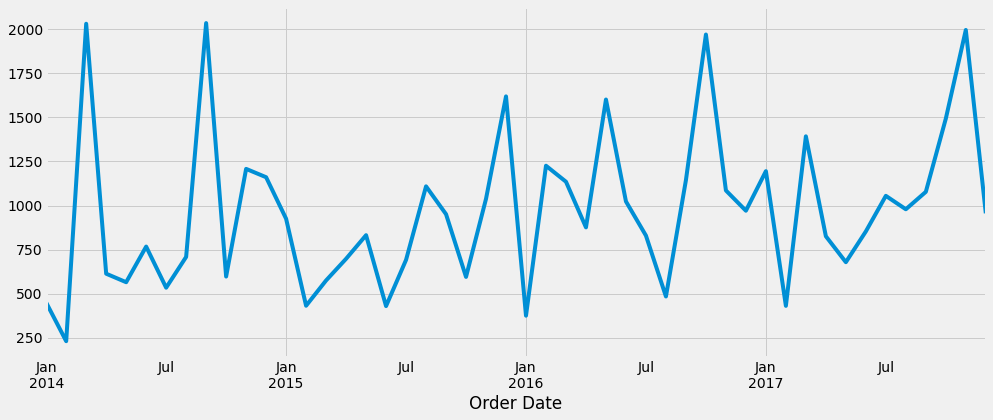

In [21]:
y.plot(figsize=(15, 6))
plt.show()

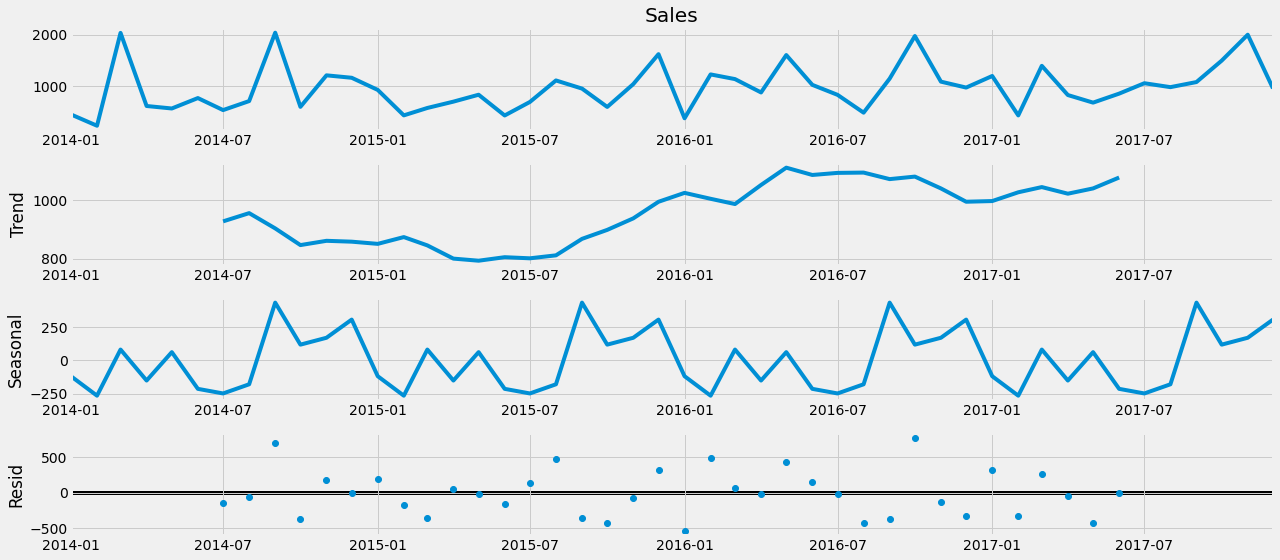

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [23]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 15) for x in list(itertools.product(p, d, q))]

In [24]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 15)
SARIMAX: (0, 0, 1) x (0, 0, 2, 15)
SARIMAX: (0, 0, 2) x (0, 0, 3, 15)
SARIMAX: (0, 0, 2) x (0, 1, 0, 15)


In [25]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, 
                                            order=param, 
                                            seasonal_order=param_seasonal, 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 15)12 - AIC:791.4891765009955
ARIMA(0, 0, 0)x(0, 0, 1, 15)12 - AIC:1302.7147331922547
ARIMA(0, 0, 0)x(0, 0, 2, 15)12 - AIC:279.75152420126966
ARIMA(0, 0, 0)x(0, 0, 3, 15)12 - AIC:41.1810531931184
ARIMA(0, 0, 0)x(0, 1, 0, 15)12 - AIC:503.5718088679213
ARIMA(0, 0, 0)x(0, 1, 1, 15)12 - AIC:269.05142963864057
ARIMA(0, 0, 0)x(0, 1, 2, 15)12 - AIC:38.80441672739046
ARIMA(0, 0, 0)x(0, 1, 3, 15)12 - AIC:8.0
ARIMA(0, 0, 0)x(0, 2, 0, 15)12 - AIC:286.1733034211883
ARIMA(0, 0, 0)x(0, 2, 1, 15)12 - AIC:37.30769181224453
ARIMA(0, 0, 0)x(0, 2, 2, 15)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 2, 3, 15)12 - AIC:8.0
ARIMA(0, 0, 0)x(0, 3, 0, 15)12 - AIC:38.79874770767242
ARIMA(0, 0, 0)x(0, 3, 1, 15)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 3, 2, 15)12 - AIC:6.0
ARIMA(0, 0, 0)x(0, 3, 3, 15)12 - AIC:8.0
ARIMA(0, 0, 0)x(1, 0, 0, 15)12 - AIC:519.7798615047685
ARIMA(0, 0, 0)x(1, 0, 1, 15)12 - AIC:985.5607424088628
ARIMA(0, 0, 0)x(1, 0, 2, 15)12 - AIC:273.18930594642086
ARIMA(0, 0, 0)x(1, 0, 3, 15)12 - AIC

In [26]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(3, 3, 3),
                                seasonal_order=(2, 0, 0, 15),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7153     16.429     -0.104      0.917     -33.915      30.485
ar.L2         -1.1543     24.330     -0.047      0.962     -48.840      46.531
ar.L3         -0.1910     12.783     -0.015      0.988     -25.246      24.864
ma.L1          0.6829     14.824      0.046      0.963     -28.371      29.737
ma.L2         -0.6331      9.207     -0.069      0.945     -18.679      17.413
ma.L3         -0.5644      4.058     -0.139      0.889      -8.518       7.389
ar.S.L15      -0.6427      2.809     -0.229      0.819      -6.148       4.862
ar.S.L30       0.6254      0.644      0.971      0.332      -0.637       1.888
sigma2      3.371e+05   2.37e+05      1.425      0.154   -1.27e+05    8.01e+05


In [28]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1152x576 with 0 Axes>

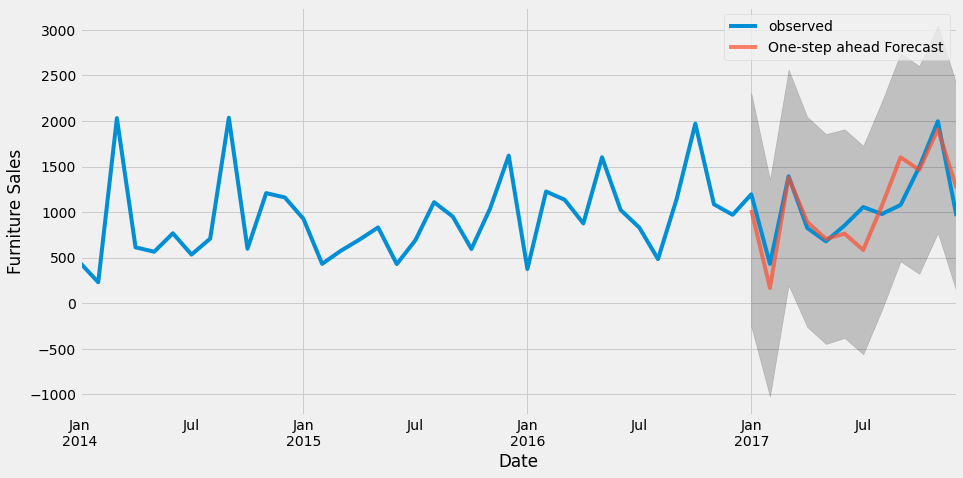

In [30]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [31]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 59874.24
The Root Mean Squared Error of our forecasts is 244.69


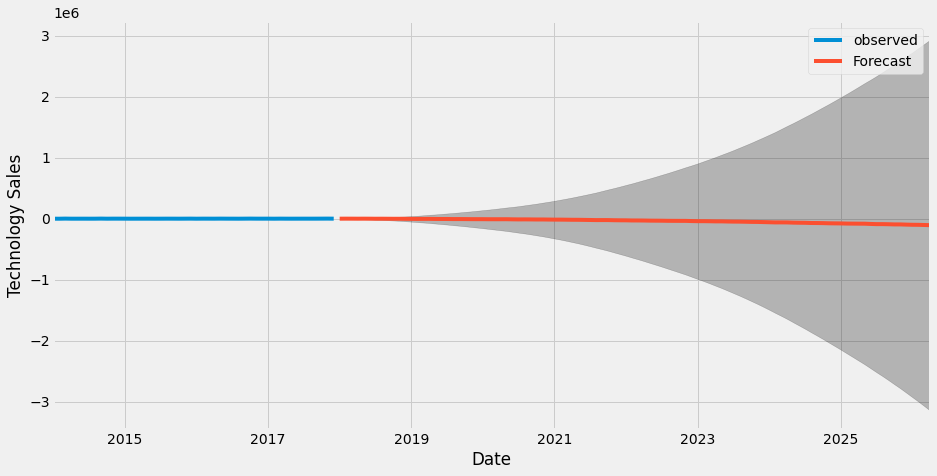

In [32]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()

- https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b